In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.integrate import quad
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

class FileRead:
    def readingfile(self,filepath):
        global data
        data = pd.read_csv(filepath)
        pd.set_option('display.max_rows', 500)
        pd.set_option('display.max_columns', 500)
        print("Top 5 rows",data.head())
        
        #Outlier count
    def outlier(self,data):
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        Outlier=((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum().astype(float)
        print("Outlier", Outlier)
        
    def statmertic(self,data):
        print("Info",data.info())
        print("Covariance",data.cov())
        print("Describe",data.describe(include='all').T)
        print("Any Nulls",data.isnull().sum())
        print("Info",data.info())
        print("Skewness",data.skew(axis = 0, skipna = True))
        print("kurt",data.kurt(axis = 0,skipna = True))
        print("correlation",data.corr())
        
    def catconv(self,data,colname):
        data[colname] = pd.Categorical(data[colname])
        print(data[colname].value_counts)
        
    def aovtable(self,data,formula):
        formula = formula
        model = ols(formula, data).fit()
        aov_table = anova_lm(model,type=2)
        print(aov_table)
        
class Plot(FileRead):
    def pointplot(self,data,x,y,hue):
        if hue =='None':
            sns.pointplot(x=x, y=y, data=data)
            plt.show()
            sns.pointplot(x=x, y=y, data=data,ci=None)
            plt.show()
        else:
            sns.pointplot(x=x, y=y, data=data, hue=hue)
            plt.show()
            sns.pointplot(x=x, y=y, data=data, hue=hue, ci=None)
            plt.show()
    def boxplot(self,data,x,y,hue):
        sns.boxplot(x=x, y=y, data=df,hue=hue)
        plt.show()
        

d=Plot()
d.readingfile("D:/GL/Total DS Codes2/Assignment3/Fever.csv")
d.statmertic(data)
# d.catconv(data,'Relief')
# d.catconv(data,'Volunteer')
d.catconv(data,'A')
d.aovtable(data,'Relief ~ C(A)')
# d.aovtable(data,'A ~ C(Relief)')
# d.catconv(data,'gender')
# d.catconv(data,'Diet')
# d.aovtable(data,'weight6weeks ~ C(gender)+C(Diet)')
# d.aovtable(data,'weight6weeks ~ C(Diet)')
# d.aovtable(data,'weight6weeks ~ C(gender)+C(Diet)+preweight+C(gender):C(Diet)')
# d.pointplot(data,'gender','weight6weeks','Diet')



Top 5 rows    A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB
Info None
Covariance                   A         B  Volunteer     Relief
A          0.685714  0.000000   0.000000   2.040000
B          0.000000  0.685714   0.000000   1.491429
Volunteer  0.000000  0.000000   1.285714  -0.002857
Relief     2.040000  1.491429  -0.002857  10.706571
Describe            count      mean       std  min    25%  50%    75%   max
A           36.0  2.000000  0.828079  1.0  1.000  2.0  3.000   3.0
B           36.0  2.000000  0.828079  1.0  1.000  2.0  3.000   3.0
Volunteer   36.0  2.500000  1.133893  1.0  1.750  2.5  3.2

In [5]:
# d.aovtable(data,'B ~ C(Relief)')

In [2]:
d.catconv(data,'B')
d.aovtable(data,'Relief ~ C(B)')

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     2
8     3
9     3
10    3
11    3
12    1
13    1
14    1
15    1
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    3
24    1
25    1
26    1
27    1
28    2
29    2
30    2
31    2
32    3
33    3
34    3
35    3
Name: B, dtype: category
Categories (3, int64): [1, 2, 3]>
            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


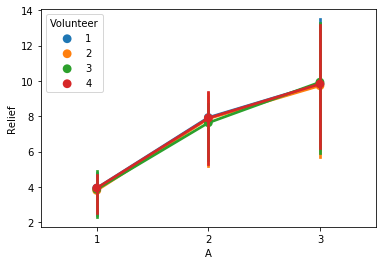

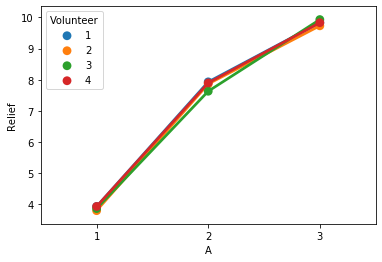

In [3]:
d.pointplot(data,'A','Relief','Volunteer')

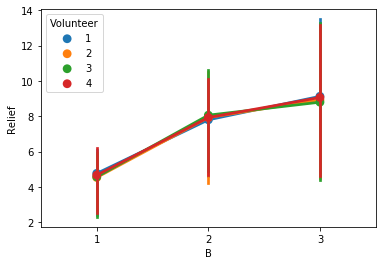

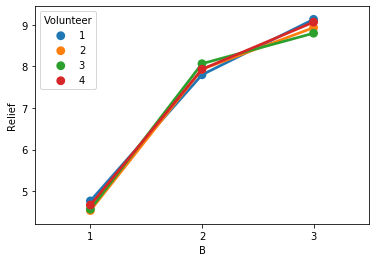

In [4]:
d.pointplot(data,'B','Relief','Volunteer')

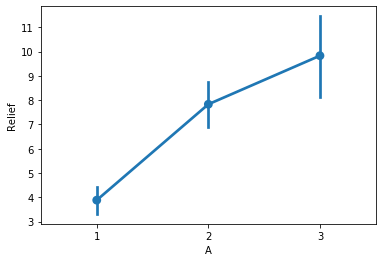

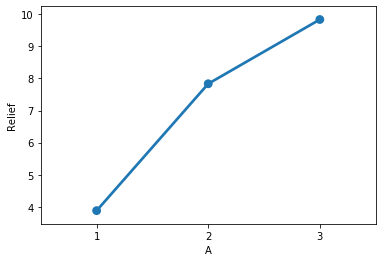

In [19]:
d.pointplot(data,'A','Relief','None')

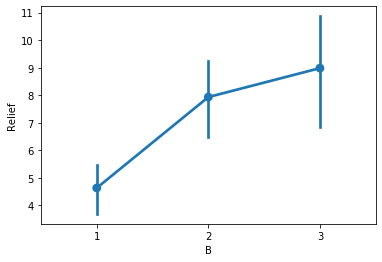

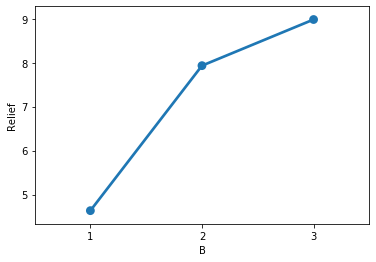

In [20]:
d.pointplot(data,'B','Relief','None')

In [5]:
# d.catconv(data,'Volunteer')
# d.aovtable(data,'A ~ C(Relief)+C(Volunteer)')
# d.aovtable(data,'A ~ C(Relief)+Volunteer')
# d.aovtable(data,'A ~ Relief+C(Volunteer)')

# d.aovtable(data,'B ~ C(Relief)+C(Volunteer)')
# d.aovtable(data,'B ~ C(Relief)+Volunteer')
# d.aovtable(data,'B ~ Relief+C(Volunteer)')

d.aovtable(data,'Relief ~ C(A)+C(B)')

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


In [13]:
d.aovtable(data,'Relief ~ C(A):C(B)')
d.aovtable(data,'Relief ~ C(A):C(B)+C(A)*C(B)')

             df   sum_sq    mean_sq           F        PR(>F)
C(A):C(B)   8.0  373.105  46.638125  774.910385  7.710504e-30
Residual   27.0    1.625   0.060185         NaN           NaN
             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


In [14]:
d.aovtable(data,'Relief ~ C(A)+C(B)+C(A):C(B)')
d.aovtable(data,'Relief ~ C(A)+C(B)+C(A):C(B)+C(A)*C(B)')

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN
             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


In [15]:
d.aovtable(data,'Relief ~ C(A)+C(B)+C(A):C(B)+Volunteer')
d.aovtable(data,'Relief ~ C(A)+C(B)+C(A):C(B)+Volunteer+C(A)*C(B)')

             df      sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020000  110.010000  1760.400739  1.765119e-28
C(B)        2.0  123.660000   61.830000   989.415305  2.935240e-25
C(A):C(B)   4.0   29.425000    7.356250   117.716098  2.938033e-16
Volunteer   1.0    0.000222    0.000222     0.003556  9.529043e-01
Residual   26.0    1.624778    0.062491          NaN           NaN
             df      sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020000  110.010000  1760.400739  1.765119e-28
C(B)        2.0  123.660000   61.830000   989.415305  2.935240e-25
C(A):C(B)   4.0   29.425000    7.356250   117.716098  2.938033e-16
Volunteer   1.0    0.000222    0.000222     0.003556  9.529043e-01
Residual   26.0    1.624778    0.062491          NaN           NaN


In [16]:
d.aovtable(data,'Relief ~ C(A)+C(B)+Volunteer')
d.aovtable(data,'Relief ~ C(A)+C(B)+Volunteer+C(A)*C(B)')

             df      sum_sq     mean_sq           F        PR(>F)
C(A)        2.0  220.020000  110.010000  106.290616  2.420811e-14
C(B)        2.0  123.660000   61.830000   59.739558  3.452320e-11
Volunteer   1.0    0.000222    0.000222    0.000215  9.884061e-01
Residual   30.0   31.049778    1.034993         NaN           NaN
             df      sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020000  110.010000  1760.400739  1.765119e-28
C(B)        2.0  123.660000   61.830000   989.415305  2.935240e-25
C(A):C(B)   4.0   29.425000    7.356250   117.716098  2.938033e-16
Volunteer   1.0    0.000222    0.000222     0.003556  9.529043e-01
Residual   26.0    1.624778    0.062491          NaN           NaN


In [17]:
d.aovtable(data,'Relief ~ C(A):C(B)+Volunteer')
d.aovtable(data,'Relief ~ C(A):C(B)+Volunteer+C(A)*C(B)')

             df      sum_sq    mean_sq           F        PR(>F)
C(A):C(B)   8.0  373.105000  46.638125  746.312060  1.059051e-28
Volunteer   1.0    0.000222   0.000222    0.003556  9.529043e-01
Residual   26.0    1.624778   0.062491         NaN           NaN
             df      sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020000  110.010000  1760.400739  1.765119e-28
C(B)        2.0  123.660000   61.830000   989.415305  2.935240e-25
C(A):C(B)   4.0   29.425000    7.356250   117.716098  2.938033e-16
Volunteer   1.0    0.000222    0.000222     0.003556  9.529043e-01
Residual   26.0    1.624778    0.062491          NaN           NaN


In [11]:
d.aovtable(data,'Relief ~ C(A)*C(B)')

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


In [12]:
d.aovtable(data,'Relief ~ C(A)+C(B)+C(A)*C(B)')

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN
